# Frequency Response Equalizing - with FIR
### with TCPi Channel and ESP32 as Server

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathfinder import Pathfinder

# abs_paths = [' ']
# Pathfinder.relative_paths_from_abs(abs_paths)
 
relative_paths = [['..', '..', '..', '..', '..', 'SigmaDSP', 'bitbucket', 'github', 'codes'],
                  ['..', '..', '..', '..', '..', 'Signal Generators', 'bitbucket', 'github', 'codes'],
                  ['..', '..', '..', '..', '..', 'Utilities', 'bitbucket', 'github', 'codes'], 
                  ['..', '..', '..', '..', '..', 'TCPi', 'bitbucket', 'github', 'codes']] 

Pathfinder.append_relative_paths(relative_paths)
# =====================================================

import pandas as pd

#https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)
# =====================================================

## TCPi

import time 

from tcpi.protocols.TCPIP1701 import class_finder
# =====================================================

### Client

from tcpi.bus.tcpi_client import I2C as TcpI2C_client

tcpi_client = TcpI2C_client(class_finder)
server_ip = '192.168.228.36'
tcpi_client.connect(server_ip = server_ip, server_port = 8086)
time.sleep(1)
# =====================================================

## DSP processor

from sigma.sigma_dsp.adau import ADAU1401

# dsp = ADAU1401(bus = bus)
dsp = ADAU1401(bus = tcpi_client)
# =====================================================


[Connecting server: ('192.168.228.36', 8086)]

[Connected with server: ('192.168.228.36', 8086)]


### Reset if needed

In [3]:
# CMD_RESET = b'Reset'

# tcpi_client.send(CMD_RESET)

In [4]:
# tcpi_client.connect(server_ip = server_ip, server_port = 8086)

In [5]:
# tcpi_client.set_server_property('name', 'Stereo Speakers')

In [6]:
# tcpi_client.get_server_property('name')

In [7]:
# servers = {}
# servers[tcpi_client.get_server_property('name')] = tcpi_client.socket.getpeername()
# servers

## SigmaStudio project file

In [8]:
import os

SigmaStudio_project_file_url = os.sep.join(['..', 'SigmaStudio projects', 'projects', 'demo', 'demo.dspproj'])
SigmaStudio_project_file_url

'..\\SigmaStudio projects\\projects\\demo\\demo.dspproj'

![](https://github.com/Wei1234c/DRC/blob/master/SigmaStudio%20projects/projects/demo/demo.png?raw=true)

## Factory

In [9]:
import os
from sigma.factory import Factory 

project_xml_file_url = os.sep.join(['..', '..', 'SigmaStudio projects', 'projects', 'demo', 'demo.xml'])
class_files_root_url = os.sep.join(['..', '..', '..', '..', '..', 'SigmaDSP', 'bitbucket', 'github', 'codes', 'sigma', 'sigma_studio', 'toolbox', 'cells']) 

factory = Factory(project_xml_file_url = project_xml_file_url,
                  class_files_root_url = class_files_root_url,
                  dsp = dsp
                 )

## IC

In [10]:
# showing cells, algorithms, parameters of this project

ic = factory.get_ic()
ic.df

param_full_name  \
algorithm_name              cell_name     param_name                                                       
EQ1940Invert                Invert0       gain                                         EQ1940Invert1gain   
                            Invert1       gain                                         EQ1940Invert2gain   
FIRFiltAlg                  FIR0          fircoeff_0                               FIRFiltAlg1fircoeff_0   
                            FIR1          fircoeff_0                               FIRFiltAlg2fircoeff_0   
Gain1940AlgNS               Gain0                                                         Gain1940AlgNS2   
                            Gain1                                                         Gain1940AlgNS1   
MultCtrlFracDelGrowFixedAlg Delay0                                          MultCtrlFracDelGrowFixedAlg1   
                                          Limit1buffersize  MultCtrlFracDelGrowFixedAlg1Limit1buffersize   
                            Delay1                                          MultCtrlFracDelGrowFixedAlg2   
                                          Limit1buffersize  MultCtrlFracDelGrowFixedAlg2Limit1buffersize   
MuteNoSlewAlg               Mute00        mute                                        MuteNoSlewAlg1mute   
                            Mute01        mute                                        MuteNoSlewAlg2mute   
                            Mute10        mute                                        MuteNoSlewAlg3mute   
                            Mute11        mute                                        MuteNoSlewAlg4mute   
PEQ1Chan                    Param EQ0     0B1                                               PEQ1Chan20B1   
                                          0B10                                             PEQ1Chan20B10   
                                          0B2                                               PEQ1Chan20B2   
                                          0B3                                               PEQ1Chan20B3   
                                          0B4                                               PEQ1Chan20B4   
                                          0B5                                               PEQ1Chan20B5   
                                          0B6                                               PEQ1Chan20B6   
                                          0B7                                               PEQ1Chan20B7   
                                          0B8                                               PEQ1Chan20B8   
                                          0B9                                               PEQ1Chan20B9   
                                          1A1                                               PEQ1Chan21A1   
                                          1A10                                             PEQ1Chan21A10   
                                          1A2                                               PEQ1Chan21A2   
                                          1A3                                               PEQ1Chan21A3   
                                          1A4                                               PEQ1Chan21A4   
                                          1A5                                               PEQ1Chan21A5   
                                          1A6                                               PEQ1Chan21A6   
                                          1A7                                               PEQ1Chan21A7   
                                          1A8                                               PEQ1Chan21A8   
                                          1A9                                               PEQ1Chan21A9   
                                          1B1                                               PEQ1Chan21B1   
                                          1B10                                             PE

## Cells 

In [11]:
cells = factory.get_cells(ic)

### Get Cell objects ready for use.

In [12]:
# # un-comment this to generate a script to embody Cell objects.

# for o in factory.get_cells_manifest():
#     print(o) 

In [13]:
# assign variable names to each Cell for easy access.

delay0 = cells['Delay0']  # Fractional Delay( 1 )
delay1 = cells['Delay1']  # Fractional Delay( 1 )
fir0 = cells['FIR0']  # FIR( 1 )
fir1 = cells['FIR1']  # FIR( 1 )
gain0 = cells['Gain0']  # Gain (no slew)( 1 )
gain1 = cells['Gain1']  # Gain (no slew)( 1 )
invert0 = cells['Invert0']  # Invert( 1 )
invert1 = cells['Invert1']  # Invert( 1 )
merger0 = cells['Merger0']  # Signal MixerC
merger1 = cells['Merger1']  # Signal MixerC
mute00 = cells['Mute00']  # No Slew (Standard)( 1 )
mute01 = cells['Mute01']  # No Slew (Standard)( 1 )
mute10 = cells['Mute10']  # No Slew (Standard)( 1 )
mute11 = cells['Mute11']  # No Slew (Standard)( 1 )
param_eq0 = cells['Param EQ0']  # PEQ1Chan - Double Precision( 1 )
param_eq1 = cells['Param EQ1']  # PEQ1Chan - Double Precision( 1 )
pink_flt1 = cells['Pink Flt1']  # Pink Noise Filter( 1 )
source_switch = cells['Source_Switch']  # Stereo SW Slew( 3 )
sw_noise = cells['SW_noise']  # Mono SW Slew( 2 )
tone = cells['Tone']  # Tone Synthesis (lookup/sine)( 1 )
white_noise = cells['White_Noise']  # White Noise( 1 )

# Frequency Response Tuning

In [14]:
relative_paths = [['..', '..', '..', '..', '..', '..', '..', '資料科學', 'Allen Downey', 'Think DSP', 'code'],
                  ['..', '..', '..', '..', '..', 'AutoEq'],
                  ['..', '..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

# import thinkdsp
# from drc.sound import Sound, Channel, InputDevice

import time
import thinkdsp
from drc.tuners.response.equalizer import ResponseEqualizer
from drc.measurements.frequency import plot_spectrum
from drc.measurements import Sampler

In [15]:
# from pprint import pprint

# pprint(Sound.scan_devices(0))

## Setup Source Signal

In [16]:
# switch to white noise
source_switch.switch(1)
invert1.enable(False)
sw_noise.switch(1)

## Mute other speakers (leave targeted one alone)

In [17]:
sampling_rate = 48000

In [18]:
mute00.mute(False)
mute01.mute(True)
mute10.mute(True)
mute11.mute(True) 

In [19]:
# with open('white noise.bin', 'br') as f:
#     data = pickle.load(f)
    
# ch = Channel(data, framerate = sampling_rate)

# Get Samples

In [20]:
def probe(target_dB = 70, plot = True):
    fs, amps, ch = Sampler.probe(input_device_idx = 1, framerate = 48000, freq_lims = (20, 20000))        
    if plot:
        plot_spectrum(fs, amps)
        plt.plot(fs, np.ones_like(amps) * target_dB, linewidth = 3, color = 'orange') 
        
    return fs, amps, ch

# FIR Filter

In [21]:
taps_size = 256

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


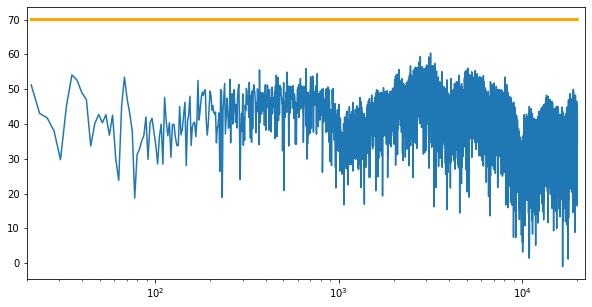

In [22]:
fs, amps, ch = probe();

In [23]:
# ch = ResponseEqualizer.get_sample(input_device_idx = 1, chunk_size = 256)

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


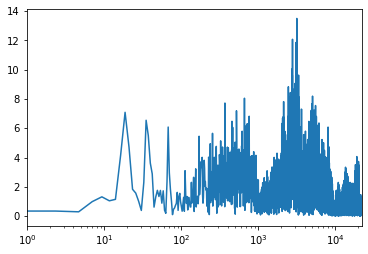

In [24]:
sp = ch.make_spectrum(full = False)
sp.plot()
plt.xscale('log')

In [25]:
amps = sp.amps

In [26]:
# window = np.hanning(201)
# window /= sum(window)

# amps = np.convolve(amps , window,mode = 'same')
# plt.plot(sp.fs,  amps)
# amps.shape, sp.fs.shape

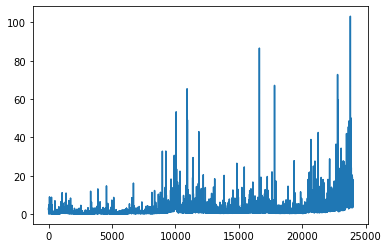

In [27]:
sp_rev = thinkdsp.Spectrum(1/amps, sp.fs, sp.framerate)
sp_rev.plot() 

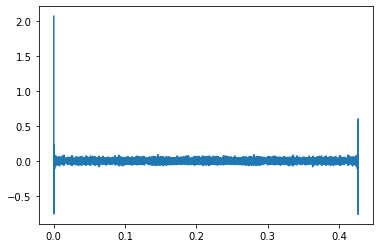

In [28]:
wave_rev = sp_rev.make_wave()
wave_rev.plot()

5.198581383381374

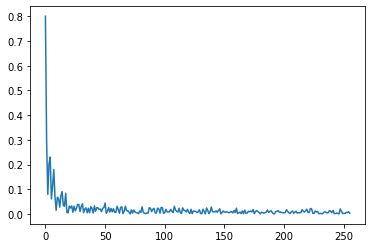

In [29]:
coeffs = np.abs(wave_rev.ys)[:taps_size]
coeffs = coeffs / max(coeffs) *0.8

plt.plot(coeffs);
sum(coeffs)

In [30]:
def reset_FIR():
    coeffs = np.zeros(taps_size)
    coeffs[0] = 1.0
    fir0.set_coefficients(coeffs)

In [31]:
reset_FIR()

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


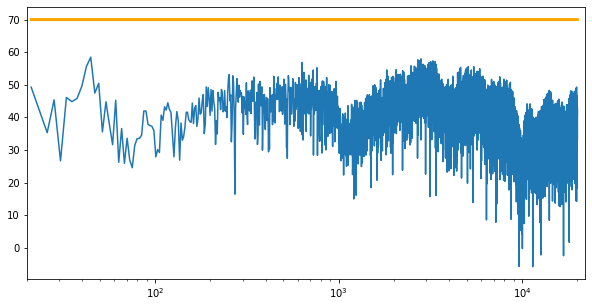

In [32]:
probe();

In [33]:
fir0.set_coefficients(coeffs)

In [34]:
fir1.set_coefficients(coeffs)

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


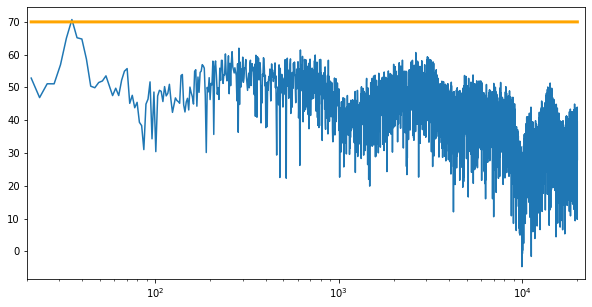

In [35]:
probe();

In [36]:
source_switch.switch(2)

In [37]:
source_switch.switch(1)

# Close TCP channels

In [38]:
# tcpi_client.stop()